##### Analysis results using: bw_atmos_monthly_cru_ts/runscript.pl
This script plots the figures 13,14 in AM4 paper Part-1. 

Long-term DJF seasonal mean 2-m temperature (◦C) over land from (a) AM4.0/LM4.0 AMIP simulation, (b) observational estimate based on CRU TS version 3.22, averaged over the 1979-2013 period. (c) shows model biases (AM4.0/LM4.0 minus CRU). (d) As in (c) except for AM2.1. (e) As in (c) except for AM3. Legends in panels (c-e) show global mean biases, spatial correlations and RMS errors.
And, also other analysis figures except for the JJA season.

Original author: Bruce Wyman, GFDL. 
To use this notebook, please ensure the Input parameters are set and run it in your jupyter notebook environment with all the dependencies installed from this gir repository.  

Note: 
This notebook was run at GFDL in a Linux environment. The environment variables used along with software requirements is documented below for your reference.

Please note that the data used by any script in this analysis suite can be found in the git repo to be able to reproduce the analysis in your local notebook. Any CMIP data references can be found in GFDL's Data Portal. Ref. http://data1.gfdl.noaa.gov

in your env Flexible Runtime Environment. The following environment variables will allow a user to run this analysis script contained within the git repo without explicit "module load". But, the user is expected to copy the directories referenced in the following from the git repo. Also, we will set up an alias to gcp commands. GCP is a GFDL home-grown smart data transfer utility. For public facing scripts, it is enough that the user uses "cp" or other copy tools relevant to their runtime environment.

Acknowledgment: 
GFDL Modeling Services and Data Portal Team.
Bruce Wyman, Huan Guo et al. 


Software Requirements

1. NCL 6.2.1 
2. NETCDF 4.2
3. HDF 1.8.8
4. Python2.Xwith (subprocess,commands,os,sys,git)
    Run using: 2.7.12 |Anaconda custom (64-bit)
    [GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
5. NCO 4.3.1
6. PERL v5.10.1
7. intel_compilers/11.1.073 


In [3]:
import os
import subprocess,commands,os,sys
from subprocess import PIPE
from git import Repo

#EDIT THIS AS NEEDED#
#INPUT PARAMETERS

os.environ['GITROOT']='/home/a1r/AM4/' #Where is your cloned git repo?
os.environ['TMPDIR'] = "/tmp/a1r/v4"   #Please provide a temporary directory.
in_data_dir = '/archive/Huan.Guo/awg/warsaw/c96L33_am4p0_cmip6Diag/gfdl.ncrc4-intel-prod-openmp/pp/atmos_cmip/ts/monthly/35yr/'
out_dir= '/nbhome/a1r/bw/output/bw_atmos_monthly_cru_ts.1980-2014/v0809/' #Please provide an output directory
staticfile = os.environ['GITROOT']+'/bw/fms/atmos_static/atmos_cmip.static.nc'
#Note: Any reference to gcp or globus can be disregarded if run in outside of GFDL. Copy (or other relevant) can be used to replace the use of gcp elsewhere. 
#Similarly, dmget may not be necessary if your files are not in TAPE. Simply alias it to ls and proceed. 

os.environ['FRE_ANALYSIS_ARCHIVE']=os.environ['GITROOT']+'/bw/fms/fre-analysis/test/DET/'
#os.environ['GITROOT']+'/bw/fms/fre-analysis/test' # Please see reference in git repo
#EDIT LIBRARY LOCATIONS AS NEEDED

os.environ['NCARG_ROOT']='/usr/local/x64/ncarg-6.2.1'
os.environ['PATH']='/usr/local/gcp/2.3.11:/usr/local/x64/globus/5.2.1/bin:/usr/local/x64/globus/5.2.1/sbin:/usr/local/x64/netcdf-4.2_optimized/bin:/usr/local/x64/nco-4.3.1/bin:/usr/local/x64/hdf5-1.8.8_optimized/bin:/usr/local/x64/intel/Compiler/11.1/073/bin/intel64:/usr/local/x64/ncarg-6.2.1/bin:/home/gfdl/bin:/usr/local/OSoverlay/bin:/bin:/usr/bin:/usr/local/x64/bin:/usr/local/bin:/usr/local/explorer/bin:/usr/local/pgi/linux86/bin:/usr/local/cleanscape:/usr/local/toolworks/totalview/bin:/usr/local/autodesk/maya/bin:.'
os.environ['LD_LIBRARY_PATH']='/usr/local/x64/globus/5.2.1/lib64:/usr/local/x64/nco-4.3.1/lib:/usr/local/x64/netcdf-4.2_optimized/lib:/usr/local/x64/hdf5-1.8.8_optimized/lib:/usr/local/x64/intel/Compiler/11.1/073/lib/intel64:/usr/local/globus/5.2.1/lib'
os.environ['CPATH'] ='/usr/local/x64/netcdf-4.2_optimized/include:/usr/local/x64/hdf5-1.8.8_optimized/include:/usr/local/x64/ncarg-6.2.1/include'
os.environ['FPATH']='/usr/local/x64/netcdf-4.2_optimized/include'
os.environ['LIBRARY_PATH']='/usr/local/x64/netcdf-4.2_optimized/lib:/usr/local/x64/hdf5-1.8.8_optimized/lib:/usr/local/x64/ncarg-6.2.1/lib'
os.environ['GLOBUS_LOCATION']='/usr/local/x64/globus/5.2.1'
os.environ['GLOBUS_PATH']='/usr/local/x64/globus/5.2.1'
os.environ['X509_CERT_DIR']='/usr/local/x64/globus/5.2.1/etc/grid-security/certificates'
os.environ['LIBPATH']='/usr/local/x64/globus/5.2.1/lib'
os.environ['SHLIB_PATH']='/usr/local/x64/globus/5.2.1/lib'
os.environ['X509_CERT_DIR']='/usr/local/x64/globus/5.2.1/etc/grid-security/certificates'
os.environ['_LM_FILES_']='/usr/local/Modules/x64/modulefiles/ncarg/6.2.1:/usr/local/Modules/modulefiles/globus/5.2.1:/usr/local/Modules/x64/modulefiles/intel_compilers/11.1.073:/usr/local/Modules/modulefiles/gcp/2.3:/usr/local/Modules/x64/modulefiles/hdf5/1.8.8:/usr/local/Modules/x64/modulefiles/netcdf/4.2:/usr/local/Modules/x64/modulefiles/nco/4.3.1'
os.environ['MANPATH']='/usr/local/x64/nco-4.3.1/man:/usr/local/x64/netcdf-4.2_optimized/share/man:/usr/local/x64/intel/Compiler/11.1/073/man/en_US:/usr/local/globus/5.2.1/man:/home/gfdl/man:/usr/share/man:/usr/X11R6/man:/usr/local/x64/share/man:/usr/local/man:/usr/local/pgi/man:/usr/local/toolworks/totalview/man:/usr/local/ncarg/man'
os.environ['INTEL_LICENSE_FILE']='/usr/local/x64/intel/licenses'
#Turn on with appropriate values if this is relevant. For the current notebook, this is not mandatory as it's self-contained within this git repo - os.environ['FRE_ANALYSIS_GIT_URL']= 'file:///home/fms/local/opt/fre-analysis/git'


#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# Original Script and author: bw_atmos_zm_atl_pac.csh, Bruce Wyman (GFDL)
# Python Code wrappers, etc : Aparna Radhakrishnan (GFDL)
# Output: Creates figures in $out_dir/atmos_${yr1}_${yr2}
####MORE INPUT PARAMETERS######

descriptor = 'AM4.0'
yr1 = '1980'
yr2 = '2014'
BASEDIR=os.environ['GITROOT']+'/bw/bw_atmos_cru_ts_a1r' # Please see reference in git repo
########### end of analysis template variables  #######
platform = 'desktop' 

In [ ]:
TMPDIR = os.environ["TMPDIR"]
if not os.path.exists(TMPDIR):
     os.makedirs(TMPDIR)
            
if ( platform == 'hpcs-csc' ) or ( platform == 'desktop'):
    print("Running script on non-GFDL machine and public repo: skip module load") 
else:
    print "ERROR: invalid platform: %s" % platform
    exit(1)

#---- Check if environment loaded correctly ---#

FRE_CODE_TAG = 'awg_v20170106'
PACKAGE_NAME = 'bw_atmos_cru_ts'
FRE_CODE_BASE = BASEDIR+'/fre-analysis'

directory = FRE_CODE_BASE+"/"+PACKAGE_NAME 
if not os.path.exists(directory):
        try:  
            os.environ["FRE_ANALYSIS_GIT_URL"]
        except KeyError: 
            sys.exit("ERROR: environment variable FRE_ANALYSIS_GIT_URL not set.Check module loads")
        GIT_REPOSITORY = os.environ.get('FRE_ANALYSIS_GIT_URL')+"/bw"
        if not os.path.exists(FRE_CODE_BASE):
            os.makedirs(FRE_CODE_BASE)

        os.chdir(FRE_CODE_BASE)

        repo = Repo.clone_from(GIT_REPOSITORY+"/"+PACKAGE_NAME+".git",directory,branch=FRE_CODE_TAG)
##################
#run the script
##################

fields = "(tauu pr curl)" # plot all fields by default

options = "-i "+in_data_dir+" -d "+descriptor+" -y "+yr1+","+yr2+" -o "+out_dir
#/tmp/a1r/temp/fre-analysis/bw_atmos_cru_ts/runscript.pl -i /archive/Huan.Guo/awg/warsaw/c96L33_am4p0_cmip6Diag/gfdl.ncrc4-intel-prod-openmp/pp/atmos_cmip/ts/monthly/35yr/ -d c96L33_am4p0_cmip6Diag -o /nbhome/Huan.Guo/awg/warsaw/c96L33_am4p0_cmip6Diag -y 1980,2014 -c 1980,2014,35 -s /archive/Huan.Guo/awg/warsaw/c96L33_am4p0_cmip6Diag/gfdl.ncrc4-intel-prod-openmp/pp/atmos_cmip/atmos_cmip.static.nc --statsfile -t mean -v tas

command = FRE_CODE_BASE+"/"+PACKAGE_NAME+"/runscript_public.pl -v tas "+options+ " -c "+yr1+","+yr2+",35 -s "+ staticfile+" --statsfile -t mean "

print(command)

cmd = subprocess.Popen('tcsh -c "'+command+'"',shell=True,stdout=PIPE,stdin=PIPE, stderr=PIPE)
output, errors = cmd.communicate()
print output, errors 

In [1]:
###### Output Figures are found in:  out_dir

UNCOMPRESS, AND DISPLAY FIGURES in PNG format

In [ ]:
#Use the following code uncompress analysis output and display all figures output from this analysis

#Takes your output directory as input (out_dir)
out_dir='/nbhome/a1r/bw/output/bw_atmos_monthly_cru_ts.1980-2014/v0809/'
from IPython.display import Image
from IPython.display import display

import gzip,os,sys
path2file=out_dir
for root, dirs, files in os.walk(out_dir):
    path = root.split(os.sep)
    path2file = path2file+os.path.basename(root)+"/"
    for fl in files:
        if(fl.endswith(".ps.gz")):
            if(os.path.exists(path2file+fl)):
                with gzip.open(path2file+fl, 'rb') as f:
                    file_content = f.read()
                    f.close()
                    fname = fl[:-3]
                    fname2 = fl[:-6]
                    uncompressed_path = os.path.join(path2file, fname)
                    if(os.path.exists(uncompressed_path)):
                        open(uncompressed_path, 'w').write(file_content )
                cmd = 'convert %s %s/%s.png'%( uncompressed_path,path2file,fname2)
                os.system(cmd)
        
                for root, dirs, filepng in os.walk(path2file):
                    for f in filepng:
                        if(f.endswith(".png")):
                         
                            # display all figures from this analysis.
                            display(Image(path2file+"/"+f)) #path2file+fname2+"-0.png"
           

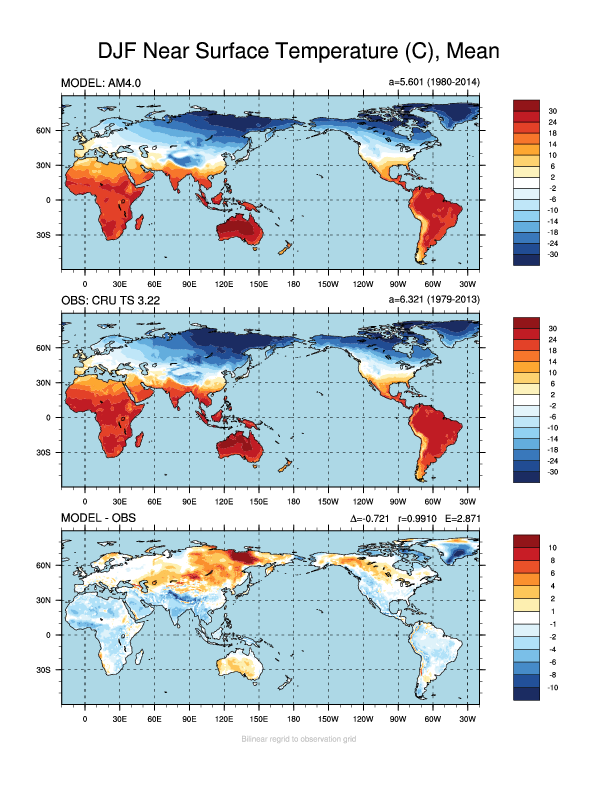

In [6]:
#Figure 13. Long-term DJF seasonal mean 2-m temperature (◦C) over land from (a) AM4.0/LM4.0 AMIP simulation, (b) observational estimate based on CRU TS version 3.22, averaged over the 1979-2013 period. (c) shows model biases (AM4.0/LM4.0 minus CRU)
display(Image('/nbhome/a1r/bw/output/bw_atmos_monthly_cru_ts.1980-2014/v0809/-s/atmos_1980_2014/Wyman.cru_ts/tas/tas.mean.GBL-1.png'))

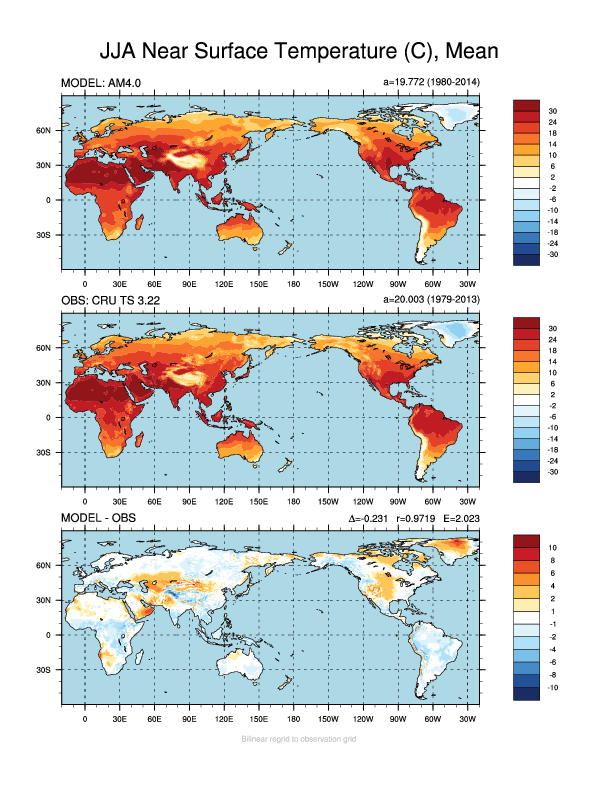

In [7]:
#Figure 14. As in Fig. 13 except for the JJA season.
display(Image('/nbhome/a1r/bw/output/bw_atmos_monthly_cru_ts.1980-2014/v0809/-s/atmos_1980_2014/Wyman.cru_ts/tas/tas.mean.GBL-3.png'))